# Corporate Credit Rating Forecasting

April 2023

## Table of Contents

1. Objective
2. Data import and exploring
3. Explanary Data Analysis
4. Model, predict and evaluate
5. Deep learning model
6. Model inpretation
7. Conclusion

In [1]:
!pip install --upgrade jinja2

In [176]:
#!pip install category_encoders

     ---------------------------------------- 81.2/81.2 kB 1.5 MB/s eta 0:00:00


In [131]:
#!pip install eli5

In [159]:
# !pip install torch

     -------------------------------------- 172.3/172.3 MB 4.2 MB/s eta 0:00:00


In [1]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from mlxtend.plotting import plot_decision_regions
from imblearn.pipeline import Pipeline
from lime.lime_tabular import LimeTabularExplainer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.neural_network import MLPClassifier
from lime.lime_tabular import LimeTabularExplainer
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

import torch.utils.data as data_utils

import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

## 1. Objective

This notebook is created upon a dataset of corporate credit ratings provided by some rating agencies. The ultimate goal of the project is to build a machine learning model from the rating data to predict the rating result that a given company is likely to receive.

Data source: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios

## 2. Data import and exploring

In [2]:
# load in data

df = pd.read_csv('corporateCreditRatingWithFinancialRatios.csv')

In [3]:
# check out the shape of the data

df.shape

(7805, 25)

In [4]:
# Taking a closer look at the dataframe

df

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,Moody's Investors Service,"eBay, Inc.",BBB+,2016-02-22,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,"eBay, Inc.",BBB+,2016-03-02,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,2016-03-08,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CCC,2016-03-24,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


In [5]:
df.head().T

,0,1,2,3,4
Rating Agency,Standard & Poor's Ratings Services,Standard & Poor's Ratings Services,Standard & Poor's Ratings Services,Standard & Poor's Ratings Services,Standard & Poor's Ratings Services
Corporation,American States Water Co.,Automatic Data Processing Inc.,Avnet Inc.,California Water Service Co.,Cardinal Health Inc.
Rating,A-,AAA,BBB-,AA-,A
Rating Date,2010-07-30,2010-09-16,2010-11-23,2010-06-29,2010-07-14
CIK,1056903,8670,8858,1035201,721371
Binary Rating,1,1,1,1,1
SIC Code,4941.0,7374.0,5065.0,4941.0,5122.0
Sector,Utils,BusEq,Shops,Utils,Shops
Ticker,AWR,ADP,AVT,CWT,CAH
Current Ratio,1.1507,1.1129,1.9276,0.8358,1.2931


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

### Label Selection and Columns Drop-off

After initial exploration of the dataset, we chose to select the rating as the lable and drop the following columns, which have no impacts on the rating results:
- Corporation, name of the company that was rated
- Rating Date, date of the rating that was issued
- CIK, Central Index Key used for electronic data gathering
- Ticker, combination of letters assigned to publicly traded companies or financial instruments

In [7]:
df = df.drop(['Corporation', 'Rating Date', 'CIK', 'Ticker'], axis=1)
df

,Rating Agency,Rating,Binary Rating,SIC Code,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,A-,1,4941.0,Utils,1.1507,0.4551,0.8847,77.6230,19.4839,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,AAA,1,7374.0,BusEq,1.1129,0.0072,0.0073,43.6619,19.8327,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,BBB-,1,5065.0,Shops,1.9276,0.2924,0.4255,11.9008,3.3173,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,AA-,1,4941.0,Utils,0.8358,0.4708,0.9491,64.5096,18.4549,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,A,1,5122.0,Shops,1.2931,0.2644,0.4036,3.8385,1.3269,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,Moody's Investors Service,BBB+,1,7370.0,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,BBB+,1,7370.0,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,CC,0,4832.0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,CCC,0,4832.0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


### Change Inappropriate Data Type

The SIC code stands for Standard Industrial Classification, which is a system used by the U.S. government to classify businesses by industry, so it should be an object instead of a numerical feature.

In [8]:
df['SIC Code'] = df['SIC Code'].astype('category')
df['Binary Rating'] = df['Binary Rating'].astype('category')
df

,Rating Agency,Rating,Binary Rating,SIC Code,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,A-,1,4941.0,Utils,1.1507,0.4551,0.8847,77.6230,19.4839,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,AAA,1,7374.0,BusEq,1.1129,0.0072,0.0073,43.6619,19.8327,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,BBB-,1,5065.0,Shops,1.9276,0.2924,0.4255,11.9008,3.3173,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,AA-,1,4941.0,Utils,0.8358,0.4708,0.9491,64.5096,18.4549,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,A,1,5122.0,Shops,1.2931,0.2644,0.4036,3.8385,1.3269,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,Moody's Investors Service,BBB+,1,7370.0,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,BBB+,1,7370.0,BusEq,3.4927,0.5065,1.0263,79.3878,25.5703,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,CC,0,4832.0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,CCC,0,4832.0,Telcm,1.7606,0.1034,0.1523,54.2787,14.2454,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


In [9]:
# Check numerical features

df.describe()

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,1.926313,0.452804,0.177349,42.433909,11.531612,11.582683,20.071493,8.659944,5.995566,0.849843,15.950507,21.481589,4.575705,7.076084,0.479756,0.119491
std,1.921651,2.629158,34.456334,23.742020,25.469044,25.483934,24.380407,27.866408,24.055577,0.696204,230.592526,462.734075,9.229899,24.382027,6.050626,7.253660
min,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800
25%,1.077300,0.286500,0.419700,22.453900,6.098200,6.181100,11.162100,4.008700,2.637100,0.399500,6.022800,-12.233900,2.391900,3.692600,-0.448500,-0.723700
50%,1.496800,0.427200,0.752800,39.635400,12.120100,12.155800,18.304500,9.705100,6.938900,0.661200,12.500000,10.564100,4.767500,7.440800,0.237800,0.133500
75%,2.161000,0.542200,1.211600,59.641700,19.464600,19.539900,30.661600,16.676900,12.366700,1.038800,20.515700,26.894100,7.881300,12.515100,1.088800,0.997800
max,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700


In [10]:
# Check categorical features and label

df.describe(include=['O'])

,Rating Agency,Rating,Sector
count,7805,7805,7805
unique,7,23,12
top,Egan-Jones Ratings Company,BBB,Other
freq,2826,910,1251


In [11]:
# Check null in the dataset

df.isna().sum()

Rating Agency                    0
Rating                           0
Binary Rating                    0
SIC Code                         0
Sector                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64

## 3. Explanary Data Analysis (EDA)

### Exploring the Label

In [12]:
# let's look at the desitribution of ratings

print(df['Rating'].value_counts())
print(' ')
print(df['Rating'].value_counts(normalize=True))

BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: Rating, dtype: int64
 
BBB     0.116592
BBB+    0.108392
A       0.107111
A-      0.092505
BBB-    0.090327
BB+     0.069827
A+      0.061243
BB      0.058040
BB-     0.054709
B+      0.054068
B       0.039718
B-      0.036899
AA-     0.032543
AA      0.023703
CCC+    0.019347
AAA     0.011531
AA+     0.009353
CCC     0.008328
CC      0.002306
C       0.001409
CCC-    0.001281
D       0.000641
CC+     0.000128
Name: Rating, dtype: float64


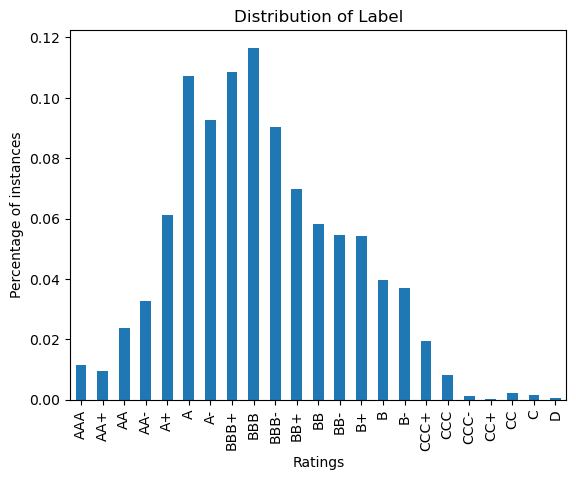

In [13]:
# Let's visualize the distribution

df['Rating'].value_counts(normalize=True).loc[['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-',\
                                               'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', \
                                              'B+', 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC+',\
                                              'CC', 'C', 'D']].plot(kind='bar');
plt.title('Distribution of Label');
plt.ylabel('Percentage of instances');
plt.xlabel('Ratings');

From the chart above, we can conclude the ratings are normally distributed in general, but not balanced distributed. In particular, for the rating grades lower then CCC, the population is quite small, which might make the predication accuracy on these grades low.

### Exploring Features

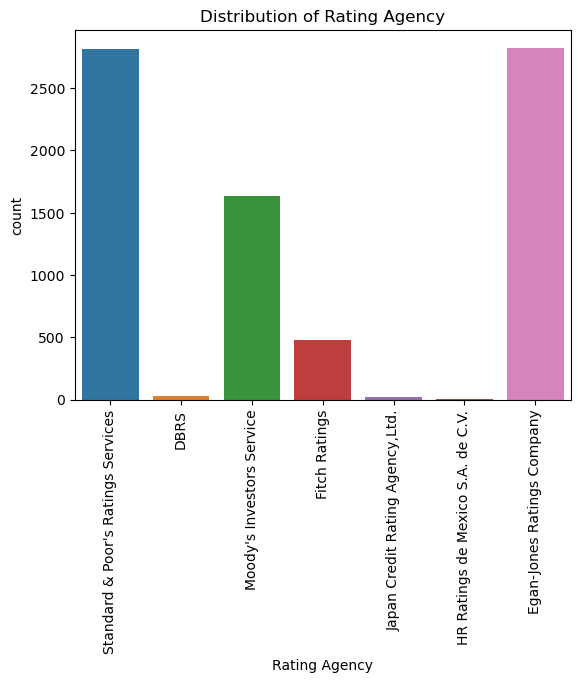

In [14]:
# Looking at rating agencies

sns.countplot(data=df, x='Rating Agency');
plt.title('Distribution of Rating Agency');
plt.xticks(rotation=90);


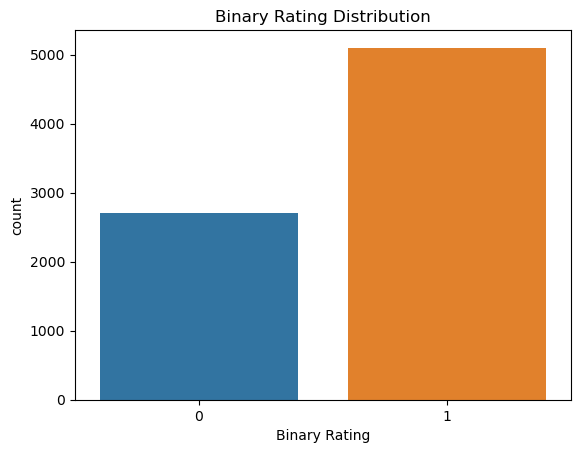

In [15]:
# Looking at Binary Rating

sns.countplot(data=df,x='Binary Rating');
plt.title('Binary Rating Distribution');

In [16]:
# Looking at SIC Code

df1 = df['SIC Code'].value_counts()
df1

1311.0    387
4911.0    313
4931.0    279
2834.0    251
3674.0    197
         ... 
8700.0      1
5940.0      1
5944.0      1
6153.0      1
100.0       1
Name: SIC Code, Length: 240, dtype: int64

In [17]:
df['SIC Code'].nunique()

240

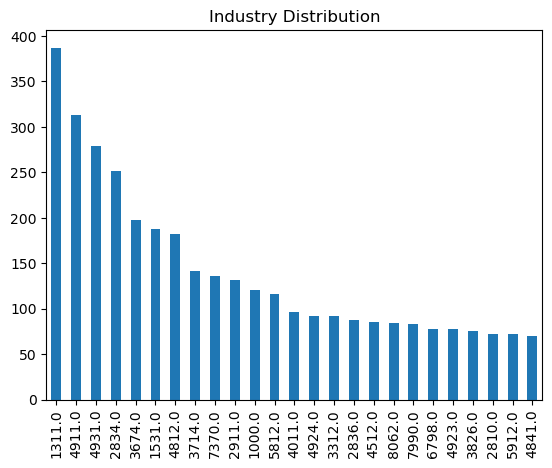

In [18]:
# Since the number of industries is too large, we just show the distribution of top 25.

df['SIC Code'].value_counts()[:25].plot(kind='bar', title = 'Industry Distribution');

In [19]:
# Looking at Sector

df2 = df['Sector'].value_counts()
df2

Other    1251
Manuf     981
BusEq     958
Utils     843
Shops     786
Enrgy     665
Hlth      625
NoDur     567
Telcm     386
Chems     315
Durbl     221
Money     207
Name: Sector, dtype: int64

In [20]:
df['Sector'].nunique()

12

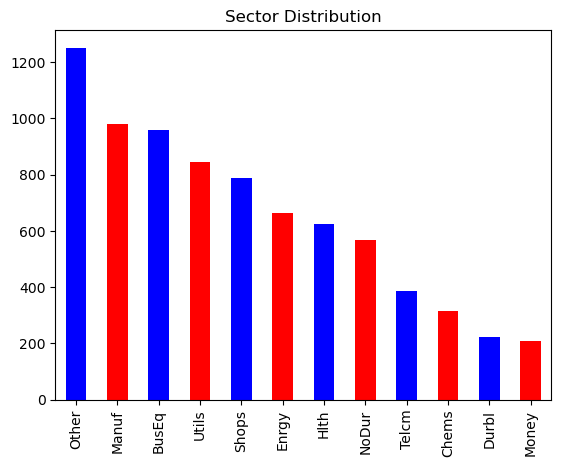

In [21]:
df['Sector'].value_counts().plot(kind='bar', title = 'Sector Distribution', color = ['blue', 'red']);

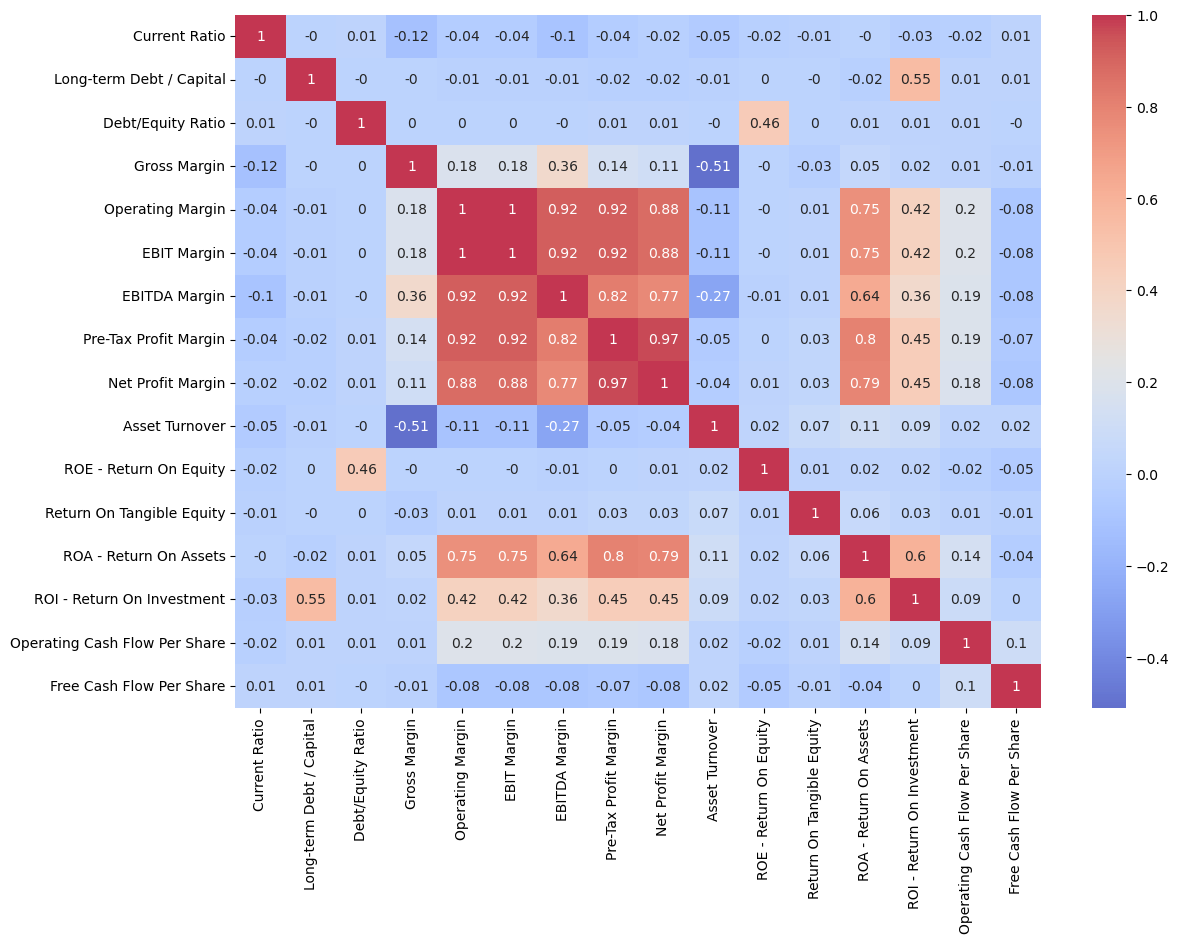

In [22]:
# Let's check the correlation between the numerical columns

plt.figure(figsize=(13,9))
sns.heatmap(round(df.corr(),2), annot=True, cmap='coolwarm', alpha=0.8)
plt.show();

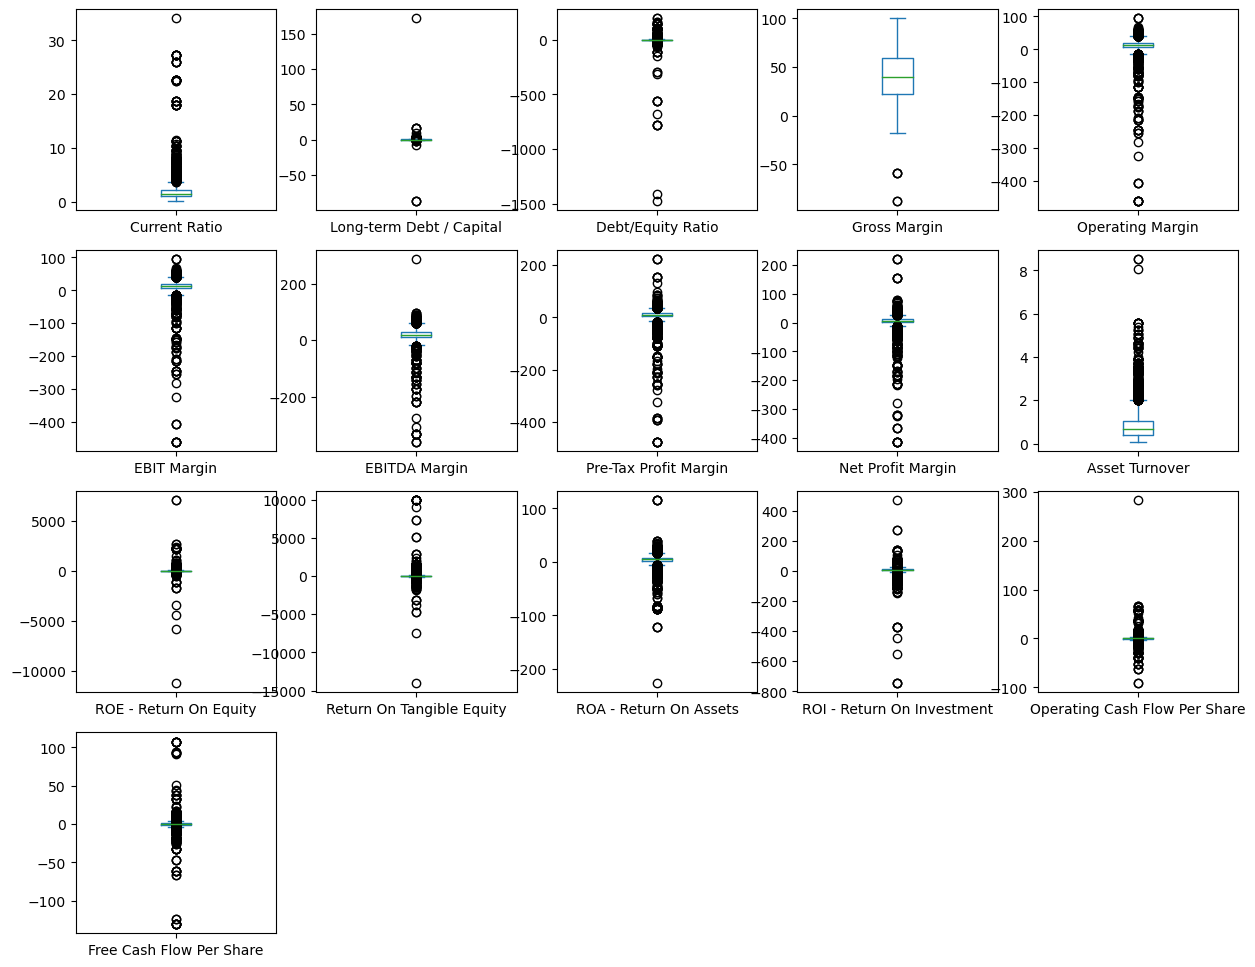

In [23]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(15,12));

From the charts above, we can find out that the outliers widely exist, so we need to adopt proper methods, say logarithm, exponential functions and quantile boundary to solve the problem. 

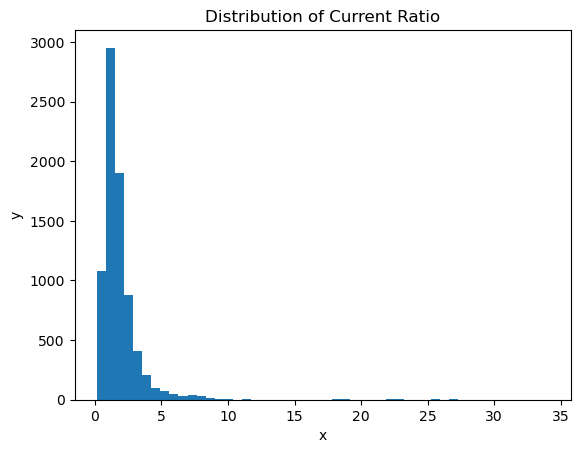

In [24]:
# Let's check the distribution of Current Ratio

plt.hist( x= df['Current Ratio'], bins=50);
plt.title('Distribution of Current Ratio')
plt.ylabel('y')
plt.xlabel('x');

In [25]:
mode = df['Current Ratio'].mode()[0]
mean = df['Current Ratio'].mean()
median = df['Current Ratio'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 1.2446
Mean: 1.926312953235111
Median: 1.4968


Since mode < median < mean, the distribution is right sckewed, we will use logarithm function in the preprocessing step.

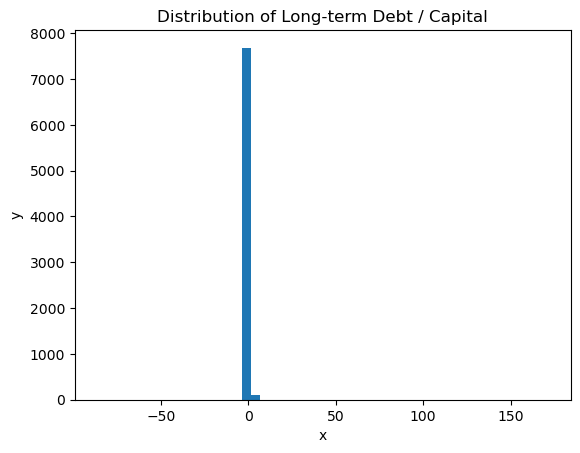

In [26]:
# Let's check the distribution of Long-term Debt / Capital

plt.hist( x= df['Long-term Debt / Capital'], bins=50);
plt.title('Distribution of Long-term Debt / Capital')
plt.ylabel('y')
plt.xlabel('x');

In [27]:
mode = df['Long-term Debt / Capital'].mode()[0]
mean = df['Long-term Debt / Capital'].mean()
median = df['Long-term Debt / Capital'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 0.4496
Mean: 0.45280370275464116
Median: 0.4272


Since mode < mean < median, the distribution is neither left nor right skewed, we need to remove the outliers by quantile boundary method in preprocessing.

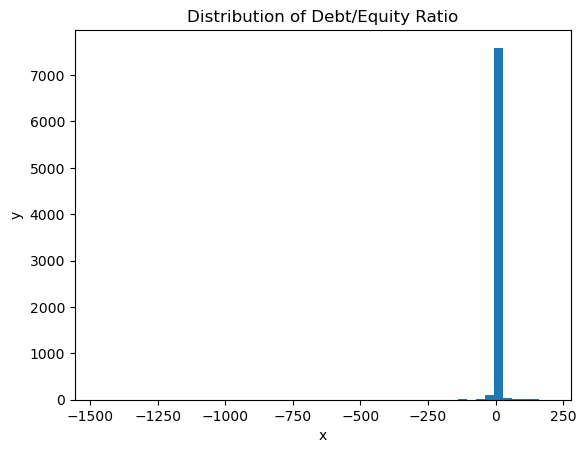

In [28]:
# Looking at Debt/Equity Ratio

plt.hist( x= df['Debt/Equity Ratio'], bins=50);
plt.title('Distribution of Debt/Equity Ratio')
plt.ylabel('y')
plt.xlabel('x');

In [29]:
mode = df['Debt/Equity Ratio'].mode()[0]
mean = df['Debt/Equity Ratio'].mean()
median = df['Debt/Equity Ratio'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 0.3164
Mean: 0.1773485842408759
Median: 0.7528


Since mean < mode < median, the distribution is neither left nor right skewed, we need to remove the outliers by quantile boundary method in preprocessing.

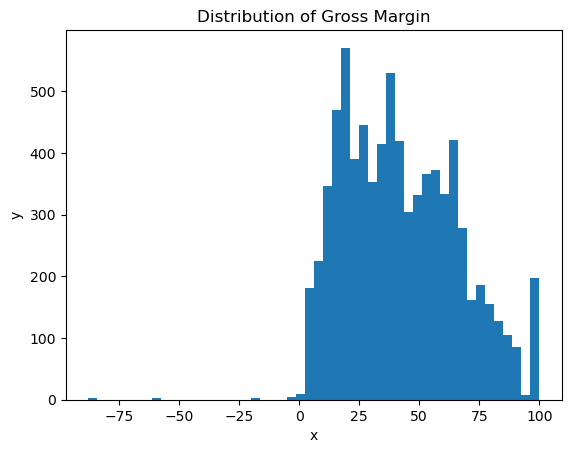

In [30]:
# Looking at Gross Margin

plt.hist( x= df['Gross Margin'], bins=50);
plt.title('Distribution of Gross Margin')
plt.ylabel('y')
plt.xlabel('x');

In [31]:
mode = df['Gross Margin'].mode()[0]
mean = df['Gross Margin'].mean()
median = df['Gross Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 100.0
Mean: 42.433908827674784
Median: 39.6354


Since median < mean < mode, the distribution is neither left nor right skewed, we need to remove the outliers by quantile boundary method in preprocessing.

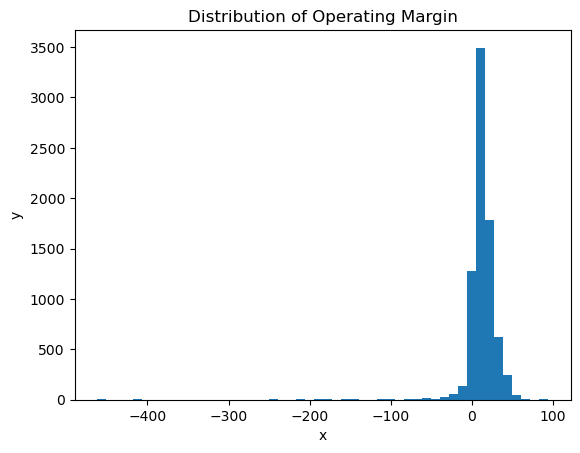

In [32]:
# Let's take a look at Operating Margin

plt.hist( x= df['Operating Margin'], bins=50);
plt.title('Distribution of Operating Margin')
plt.ylabel('y')
plt.xlabel('x');

In [33]:
mode = df['Operating Margin'].mode()[0]
mean = df['Operating Margin'].mean()
median = df['Operating Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.8957
Mean: 11.531612069186355
Median: 12.1201


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

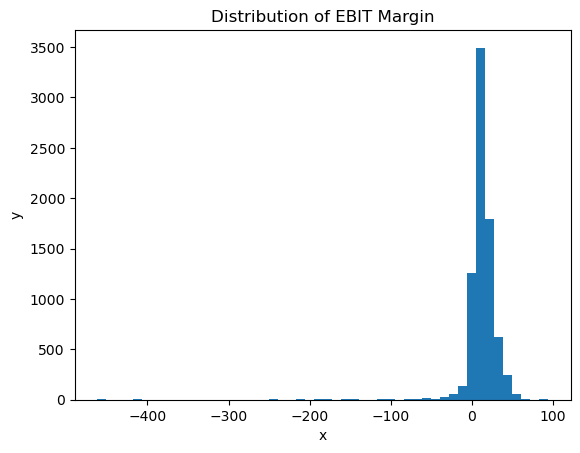

In [34]:
# Continue to look at EBIT Margin

plt.hist( x= df['EBIT Margin'], bins=50);
plt.title('Distribution of EBIT Margin')
plt.ylabel('y')
plt.xlabel('x');

In [35]:
mode = df['EBIT Margin'].mode()[0]
mean = df['EBIT Margin'].mean()
median = df['EBIT Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.8957
Mean: 11.58268261370913
Median: 12.1558


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

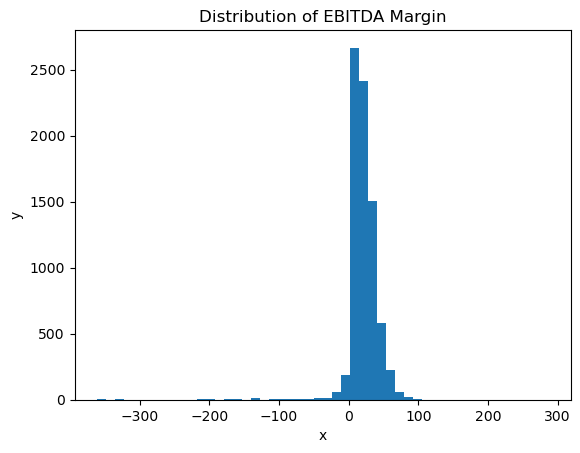

In [36]:
# Looking at EBITDA Margin

plt.hist( x= df['EBITDA Margin'], bins=50);
plt.title('Distribution of EBITDA Margin')
plt.ylabel('y')
plt.xlabel('x');

In [37]:
mode = df['EBITDA Margin'].mode()[0]
mean = df['EBITDA Margin'].mean()
median = df['EBITDA Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.8957
Mean: 20.071493440102422
Median: 18.3045


Since mode < median < mean, the distribution is right sckewed, we will use logarithm function in the preprocessing step.

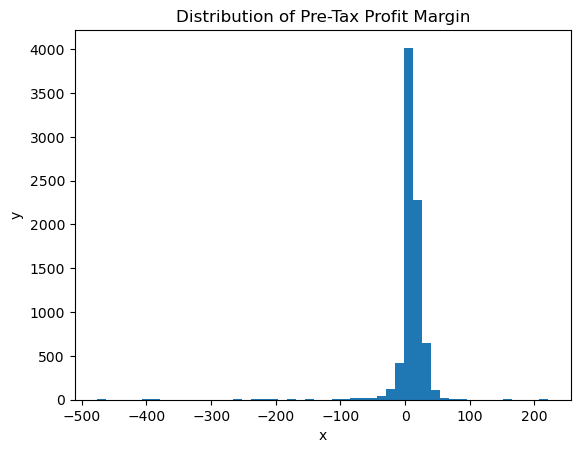

In [38]:
# let's look at Pre-Tax Profit Margin

plt.hist( x= df['Pre-Tax Profit Margin'], bins=50);
plt.title('Distribution of Pre-Tax Profit Margin')
plt.ylabel('y')
plt.xlabel('x');

In [39]:
mode = df['Pre-Tax Profit Margin'].mode()[0]
mean = df['Pre-Tax Profit Margin'].mean()
median = df['Pre-Tax Profit Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.0485
Mean: 8.65994413837287
Median: 9.7051


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

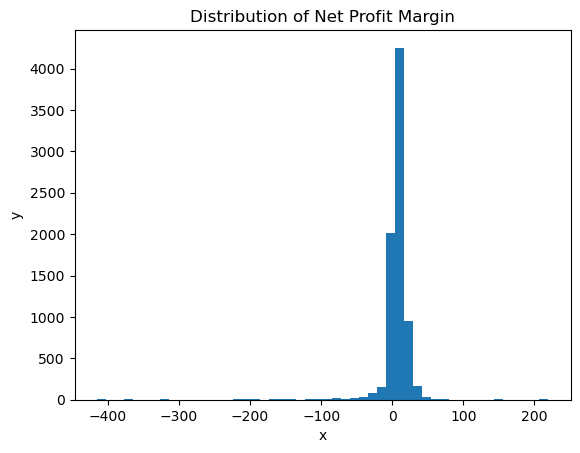

In [40]:
# Looking at Net Profit Margin

plt.hist( x= df['Net Profit Margin'], bins=50);
plt.title('Distribution of Net Profit Margin')
plt.ylabel('y')
plt.xlabel('x');

In [41]:
mode = df['Net Profit Margin'].mode()[0]
mean = df['Net Profit Margin'].mean()
median = df['Net Profit Margin'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 4.0847
Mean: 5.995565624599629
Median: 6.9389


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

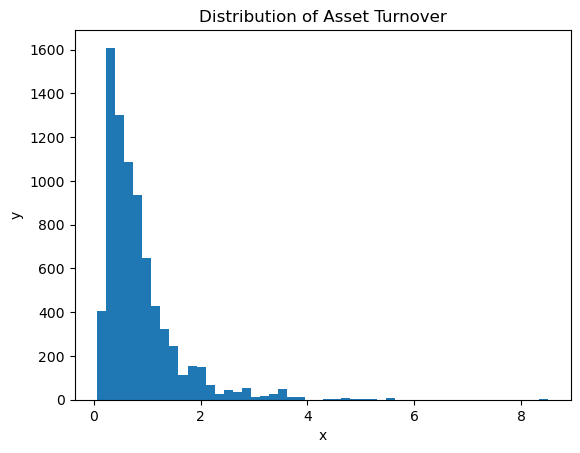

In [42]:
# Looking at Asset Turnover

plt.hist( x= df['Asset Turnover'], bins=50);
plt.title('Distribution of Asset Turnover')
plt.ylabel('y')
plt.xlabel('x');

In [43]:
mode = df['Asset Turnover'].mode()[0]
mean = df['Asset Turnover'].mean()
median = df['Asset Turnover'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 0.3114
Mean: 0.8498428187059547
Median: 0.6612


The calculation and chart above both show that the distribution of Asset Turnover is right sckewed, so logarithm function will be used to preprocess the data.

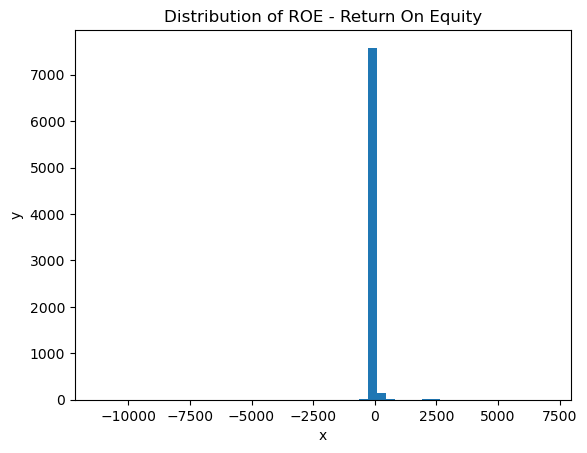

In [44]:
# Let's look at ROE - Return On Equity

plt.hist( x= df['ROE - Return On Equity'], bins=50);
plt.title('Distribution of ROE - Return On Equity')
plt.ylabel('y')
plt.xlabel('x');

In [45]:
mode = df['ROE - Return On Equity'].mode()[0]
mean = df['ROE - Return On Equity'].mean()
median = df['ROE - Return On Equity'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 4.0658
Mean: 15.950506726457421
Median: 12.5


Since mode < median < mean, the distribution is right sckewed, we will use logarithm function in the preprocessing step.

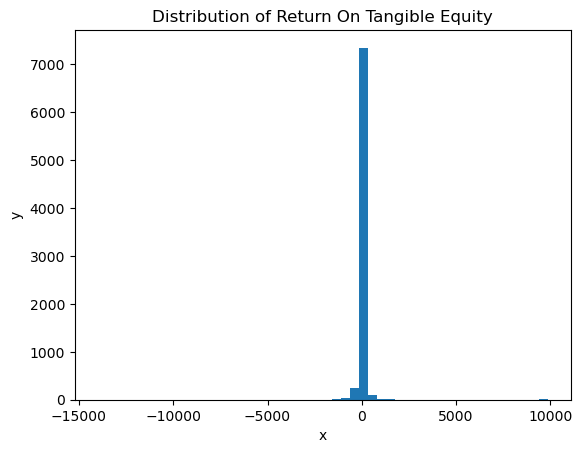

In [46]:
# Looking at Return On Tangible Equity

plt.hist( x= df['Return On Tangible Equity'], bins=50);
plt.title('Distribution of Return On Tangible Equity')
plt.ylabel('y')
plt.xlabel('x');

In [47]:
mode = df['Return On Tangible Equity'].mode()[0]
mean = df['Return On Tangible Equity'].mean()
median = df['Return On Tangible Equity'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.2108
Mean: 21.481588814862416
Median: 10.5641


Since mode < median < mean, the distribution is right sckewed, we will use logarithm function in the preprocessing step.

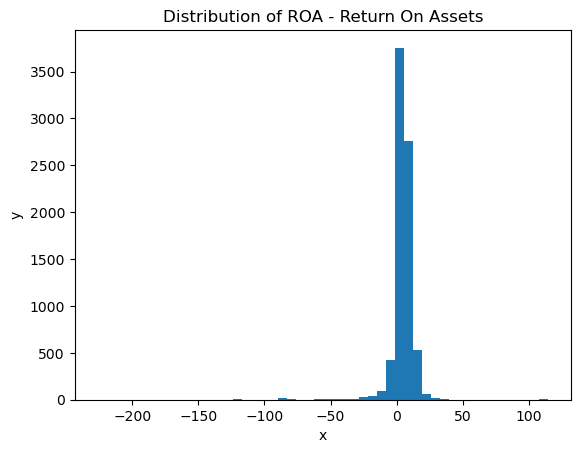

In [48]:
# Let's look at ROA - Return On Assets

plt.hist( x= df['ROA - Return On Assets'], bins=50);
plt.title('Distribution of ROA - Return On Assets')
plt.ylabel('y')
plt.xlabel('x');

In [49]:
mode = df['ROA - Return On Assets'].mode()[0]
mean = df['ROA - Return On Assets'].mean()
median = df['ROA - Return On Assets'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 6.7568
Mean: 4.575705355541342
Median: 4.7675


Since mean < median < mode, the distribution is left sckewed, we will use exponential function in the preprocessing step.

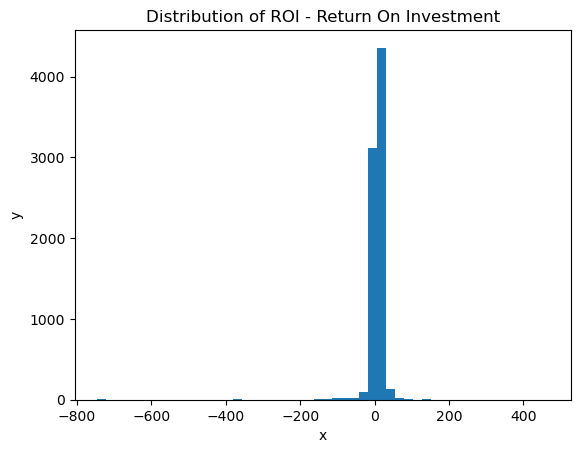

In [50]:
# Looking at ROI - Return On Investment

plt.hist( x= df['ROI - Return On Investment'], bins=50);
plt.title('Distribution of ROI - Return On Investment')
plt.ylabel('y')
plt.xlabel('x');

In [51]:
mode = df['ROI - Return On Investment'].mode()[0]
mean = df['ROI - Return On Investment'].mean()
median = df['ROI - Return On Investment'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 3.3899
Mean: 7.07608426649584
Median: 7.4408


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

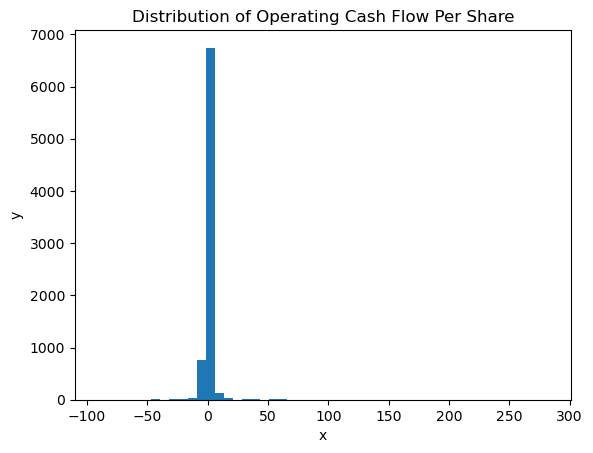

In [52]:
# Looking at Operating Cash Flow Per Share

plt.hist( x= df['Operating Cash Flow Per Share'], bins=50);
plt.title('Distribution of Operating Cash Flow Per Share')
plt.ylabel('y')
plt.xlabel('x');

In [53]:
mode = df['Operating Cash Flow Per Share'].mode()[0]
mean = df['Operating Cash Flow Per Share'].mean()
median = df['Operating Cash Flow Per Share'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: 0.2802
Mean: 0.47975597693785754
Median: 0.2378


Since median < mode < mean, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

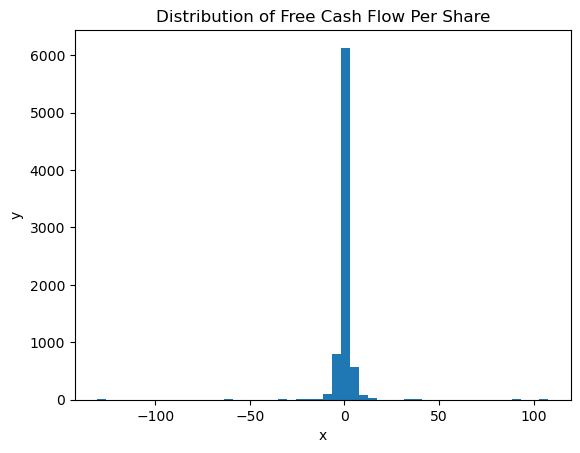

In [54]:
# Let's look at Free Cash Flow Per Share

plt.hist( x= df['Free Cash Flow Per Share'], bins=50);
plt.title('Distribution of Free Cash Flow Per Share')
plt.ylabel('y')
plt.xlabel('x');

In [55]:
mode = df['Free Cash Flow Per Share'].mode()[0]
mean = df['Free Cash Flow Per Share'].mean()
median = df['Free Cash Flow Per Share'].median()

# Print the results
print('Mode:', mode)
print('Mean:', mean)
print('Median:', median)

Mode: -1.6065
Mean: 0.11949082639333647
Median: 0.1335


Since mode < mean < median, the distribution is neither left nor right sckewed, we need to remove the outlier by quantile boundary method in the preprocessing step.

## 4. Model，Prediction and Evaluation

### Baseline Model

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Rating Agency                  7805 non-null   object  
 1   Rating                         7805 non-null   object  
 2   Binary Rating                  7805 non-null   category
 3   SIC Code                       7805 non-null   category
 4   Sector                         7805 non-null   object  
 5   Current Ratio                  7805 non-null   float64 
 6   Long-term Debt / Capital       7805 non-null   float64 
 7   Debt/Equity Ratio              7805 non-null   float64 
 8   Gross Margin                   7805 non-null   float64 
 9   Operating Margin               7805 non-null   float64 
 10  EBIT Margin                    7805 non-null   float64 
 11  EBITDA Margin                  7805 non-null   float64 
 12  Pre-Tax Profit Margin          780

In [57]:
# For create model, we need to define features and label and group both the numerical and categorical features

Features = ['Current Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share', \
            'Debt/Equity Ratio', 'Operating Margin',  'EBIT Margin', 'EBITDA Margin',\
            'Pre-Tax Profit Margin', 'Net Profit Margin', 'ROA - Return On Assets',\
            'ROI - Return On Investment', 'Long-term Debt / Capital', 'Gross Margin',\
            'ROE - Return On Equity', 'Return On Tangible Equity',\
            'Free Cash Flow Per Share', 'Rating Agency', 'Binary Rating', 'Sector', 'SIC Code']
Label = ['Rating']

nfeatures = ['Current Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share', \
            'Debt/Equity Ratio', 'Operating Margin',  'EBIT Margin', 'EBITDA Margin',\
            'Pre-Tax Profit Margin', 'Net Profit Margin', 'ROA - Return On Assets',\
            'ROI - Return On Investment', 'Long-term Debt / Capital', 'Gross Margin',\
            'ROE - Return On Equity', 'Return On Tangible Equity',\
            'Free Cash Flow Per Share']

cfeatures = ['Rating Agency', 'Binary Rating', 'Sector', 'SIC Code']

rs_nfeatures = ['Current Ratio', 'EBITDA Margin', 'Asset Turnover', 'ROE - Return On Equity', 'Return On Tangible Equity']

ls_nfeatures = [ 'ROA - Return On Assets', ]

other_nfeatures = ['Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin', 'Operating Margin', 'EBIT Margin',\
                   'Pre-Tax Profit Margin', 'Net Profit Margin', 'Free Cash Flow Per Share', \
                   'ROI - Return On Investment', 'Operating Cash Flow Per Share']

g_cfeatures = ['Rating Agency', 'Binary Rating', 'Sector']

p_cfeatures = ['SIC Code']


In [58]:
X = df[Features]


In [59]:
X.shape

(7805, 20)

In [60]:
# For create the baseline model, we also need to encode the label

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[Label])
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [203]:
df[Label]

,Rating
0,A-
1,AAA
2,BBB-
3,AA-
4,A
...,...
7800,BBB+
7801,BBB+
7802,CC
7803,CCC


In [210]:
Ynumberdf =  pd.DataFrame(y)
Ynumberdf

,0
0,2
1,6
2,15
3,5
4,0
...,...
7800,14
7801,14
7802,17
7803,19


In [214]:
pd.concat([df[Label], Ynumberdf], axis=1)

,Rating,0
0,A-,2
1,AAA,6
2,BBB-,15
3,AA-,5
4,A,0
...,...,...
7800,BBB+,14
7801,BBB+,14
7802,CC,17
7803,CCC,19


In [62]:
X[Features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Current Ratio                  7805 non-null   float64 
 1   Asset Turnover                 7805 non-null   float64 
 2   Operating Cash Flow Per Share  7805 non-null   float64 
 3   Debt/Equity Ratio              7805 non-null   float64 
 4   Operating Margin               7805 non-null   float64 
 5   EBIT Margin                    7805 non-null   float64 
 6   EBITDA Margin                  7805 non-null   float64 
 7   Pre-Tax Profit Margin          7805 non-null   float64 
 8   Net Profit Margin              7805 non-null   float64 
 9   ROA - Return On Assets         7805 non-null   float64 
 10  ROI - Return On Investment     7805 non-null   float64 
 11  Long-term Debt / Capital       7805 non-null   float64 
 12  Gross Margin                   780

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
X_train.shape

(6244, 20)

In [65]:
y_train.shape

(6244,)

In [66]:
X_test.shape

(1561, 20)

In [67]:
y_test.shape

(1561,)

In [68]:
# For the purpose that logarithm could be applied to right skewed features with negative values, we scale concerned features

scaler = MinMaxScaler()
X_train[nfeatures] = scaler.fit_transform(X_train[nfeatures])
X_test[nfeatures] = scaler.transform(X_test[nfeatures])

In [69]:
def handle_outliers(x):
    # Detect outliers using a specific method, e.g. IQR
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with a specific value or perform another handling method
    x[(x < lower_bound) | (x > upper_bound)] = np.median(x)  # Example: replace outliers with median
    return x

In [70]:
preprocessor = ColumnTransformer(
transformers = [
    ('exp', FunctionTransformer(func=np.exp), ls_nfeatures),
    ('log', FunctionTransformer(func=np.log1p), rs_nfeatures),
    ('cat', OneHotEncoder(), g_cfeatures ),
    ('target', TargetEncoder(), p_cfeatures),
    ('outlier', FunctionTransformer(func=handle_outliers), other_nfeatures)
], remainder='passthrough')

In [71]:
dt_pipeline = Pipeline([
    ('prc', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [72]:
dt_pipeline.fit(X_train,y_train)
y_pred = dt_pipeline.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       182
           1       0.64      0.67      0.66        83
           2       0.57      0.59      0.58       143
           3       0.61      0.54      0.57        41
           4       0.75      0.90      0.82        10
           5       0.59      0.72      0.65        46
           6       0.29      0.33      0.31        12
           7       0.39      0.53      0.45        68
           8       0.52      0.53      0.53        88
           9       0.46      0.31      0.37        67
          10       0.48      0.64      0.55        75
          11       0.71      0.73      0.72        88
          12       0.46      0.31      0.37        83
          13       0.57      0.57      0.57       196
          14       0.55      0.53      0.54       184
          15       0.71      0.62      0.66       142
          16       0.50      0.50      0.50         2
          17       0.00    

The performace of the model doesn't work that good, in particular in terms of some ratings with few support, so we try to add RandomOverSampler

In [74]:
dt_ros_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('dt', DecisionTreeClassifier())
])

In [75]:
dt_ros_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('exp',
                                                  FunctionTransformer(func=<ufunc 'exp'>),
                                                  ['ROA - Return On Assets']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Current Ratio',
                                                   'EBITDA Margin',
                                                   'Asset Turnover',
                                                   'ROE - Return On Equity',
                                                   'Return On Tangible '
                                                   'Equity']),
                                                 ('cat', OneHotEncoder(),
                                               

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       182
           1       0.64      0.67      0.66        83
           2       0.57      0.59      0.58       143
           3       0.61      0.54      0.57        41
           4       0.75      0.90      0.82        10
           5       0.59      0.72      0.65        46
           6       0.29      0.33      0.31        12
           7       0.39      0.53      0.45        68
           8       0.52      0.53      0.53        88
           9       0.46      0.31      0.37        67
          10       0.48      0.64      0.55        75
          11       0.71      0.73      0.72        88
          12       0.46      0.31      0.37        83
          13       0.57      0.57      0.57       196
          14       0.55      0.53      0.54       184
          15       0.71      0.62      0.66       142
          16       0.50      0.50      0.50         2
          17       0.00    

### Other types of models

To find out the most appropriate model, we try here different types of models.

In [78]:
# Let's try the Random Forest model

ros_rft_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc',  RandomForestClassifier(n_estimators=25, random_state=42))
])

ros_rft_pipeline.fit(X_train, y_train)
y_pred = ros_rft_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       182
           1       0.61      0.65      0.63        83
           2       0.63      0.57      0.60       143
           3       0.56      0.44      0.49        41
           4       0.59      1.00      0.74        10
           5       0.51      0.74      0.60        46
           6       0.31      0.42      0.36        12
           7       0.44      0.49      0.46        68
           8       0.53      0.53      0.53        88
           9       0.56      0.34      0.43        67
          10       0.46      0.57      0.51        75
          11       0.72      0.74      0.73        88
          12       0.44      0.43      0.44        83
          13       0.63      0.58      0.60       196
          14       0.60      0.56      0.58       184
          15       0.69      0.75      0.72       142
          16       1.00      0.50      0.67         2
          17       0.00    

In [79]:
# And the XGB model

ros_XGB_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('XGB', XGBClassifier())
])

ros_XGB_pipeline.fit(X_train, y_train)
y_pred = ros_XGB_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       182
           1       0.63      0.70      0.66        83
           2       0.58      0.53      0.55       143
           3       0.69      0.54      0.60        41
           4       0.59      1.00      0.74        10
           5       0.58      0.74      0.65        46
           6       0.43      0.50      0.46        12
           7       0.41      0.46      0.43        68
           8       0.52      0.51      0.52        88
           9       0.51      0.31      0.39        67
          10       0.45      0.56      0.50        75
          11       0.63      0.69      0.66        88
          12       0.51      0.47      0.49        83
          13       0.58      0.53      0.56       196
          14       0.57      0.56      0.56       184
          15       0.67      0.69      0.68       142
          16       1.00      0.50      0.67         2
          17       0.00    

Among the three types of models we tried above, Random Forest perform best, so we decide to choose it for further improvemen.

### Model Validation

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Current Ratio                  7805 non-null   float64 
 1   Asset Turnover                 7805 non-null   float64 
 2   Operating Cash Flow Per Share  7805 non-null   float64 
 3   Debt/Equity Ratio              7805 non-null   float64 
 4   Operating Margin               7805 non-null   float64 
 5   EBIT Margin                    7805 non-null   float64 
 6   EBITDA Margin                  7805 non-null   float64 
 7   Pre-Tax Profit Margin          7805 non-null   float64 
 8   Net Profit Margin              7805 non-null   float64 
 9   ROA - Return On Assets         7805 non-null   float64 
 10  ROI - Return On Investment     7805 non-null   float64 
 11  Long-term Debt / Capital       7805 non-null   float64 
 12  Gross Margin                   780

In [81]:
# Let's try Kfold Cross validation to check the stability of the model

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [82]:
# Check X_train_full and X_train

print(X_train_full.shape)
print(X_train.shape)

(6244, 20)
(6244, 20)


In [83]:
# Start Kfold Cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

kf_pipeline = Pipeline([
    ('prc', preprocessor),
    ('rft', RandomForestClassifier(n_estimators=25, random_state=42))
    ])

scores = []
for train_index, val_index in kf.split(X_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    scaler = MinMaxScaler()
    X_train[nfeatures] = scaler.fit_transform(X_train[nfeatures])
    X_val[nfeatures] = scaler.transform(X_val[nfeatures])

    ros = RandomOverSampler()
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    kf_pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = kf_pipeline.predict(X_val)

    scores.append(accuracy_score(y_val, y_pred))

    
scores

[0.5212169735788631,
 0.533226581265012,
 0.5340272217774219,
 0.5380304243394716,
 0.5240384615384616]

The consistant results show the model is quite stable.

### Hyper Parameter Tuning

In [84]:
# Now, let's try hyper parameter tuning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = MinMaxScaler()
X_train[nfeatures] = scaler.fit_transform(X_train[nfeatures])
X_test[nfeatures] = scaler.transform(X_test[nfeatures])


ros_rfc_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc', RandomForestClassifier(random_state=42))
])

parameters = {
    'rfc__max_depth' : [2,5,10,15],
    'rfc__criterion' : ['gini', 'entropy'],
    'rfc__min_samples_split' : [2,5,7],
    'rfc__n_estimators' : [100,200]
}

gcv = GridSearchCV(ros_rfc_pipeline, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=-10)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('exp',
                                                                         FunctionTransformer(func=<ufunc 'exp'>),
                                                                         ['ROA '
                                                                          '- '
                                                                          'Return '
                                                                          'On '
                                                                          'Assets']),
                                                                        ('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                   

In [85]:
final_model = gcv.best_estimator_
final_model

Pipeline(steps=[('prc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('exp',
                                                  FunctionTransformer(func=<ufunc 'exp'>),
                                                  ['ROA - Return On Assets']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Current Ratio',
                                                   'EBITDA Margin',
                                                   'Asset Turnover',
                                                   'ROE - Return On Equity',
                                                   'Return On Tangible '
                                                   'Equity']),
                                                 ('cat', OneHotEncoder(),
                                               

In [86]:
final_pred = final_model.predict(X_test)

In [87]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       182
           1       0.60      0.70      0.64        83
           2       0.64      0.57      0.61       143
           3       0.55      0.44      0.49        41
           4       0.59      1.00      0.74        10
           5       0.53      0.78      0.63        46
           6       0.38      0.50      0.43        12
           7       0.42      0.50      0.46        68
           8       0.56      0.57      0.56        88
           9       0.50      0.30      0.37        67
          10       0.49      0.64      0.55        75
          11       0.69      0.74      0.71        88
          12       0.49      0.40      0.44        83
          13       0.64      0.56      0.59       196
          14       0.61      0.58      0.59       184
          15       0.71      0.77      0.74       142
          16       1.00      0.50      0.67         2
          17       0.00    

After Hyper Parameter Tuning, the performance of the model is improved to 0.59

### Model Stacking

In [88]:
# Let's try model stacking to see whether we can make the accuracy higher

estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('knn2', KNeighborsClassifier(n_neighbors=7)),
    ('dt', DecisionTreeClassifier(max_depth=15)),
    ('dt2', DecisionTreeClassifier(max_depth=20)),
    ('rdf', RandomForestClassifier(n_estimators=100)),
    ('rdf2', RandomForestClassifier(n_estimators=200)),
    ('xgb', XGBClassifier(n_estimators=20)),
    ('xgb2', XGBClassifier(n_estimators=50)),
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier())

stacking_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('clf', clf)
])

stacking_pipeline.fit(X_train, y_train)


stacking_pipeline.score(X_test, y_test)    

0.5816784112748238

The performace of the model couldn't be further improved by stacking.

### Check splitted datasets and dataframes after encoding

In [89]:
X_train.shape

(6244, 20)

In [90]:
y_train.shape

(6244,)

In [91]:
X_train_encoded = preprocessor.fit_transform(X_train, y_train)

In [92]:
# 3

onehot_column_names = preprocessor.named_transformers_['cat'].get_feature_names(['Rating Agency', 'Binary Rating', 'Sector' ])
onehot_column_names

array(['Rating Agency_DBRS', 'Rating Agency_Egan-Jones Ratings Company',
       'Rating Agency_Fitch Ratings',
       'Rating Agency_HR Ratings de Mexico S.A. de C.V.',
       'Rating Agency_Japan Credit Rating Agency,Ltd.',
       "Rating Agency_Moody's Investors Service",
       "Rating Agency_Standard & Poor's Ratings Services",
       'Binary Rating_0', 'Binary Rating_1', 'Sector_BusEq',
       'Sector_Chems', 'Sector_Durbl', 'Sector_Enrgy', 'Sector_Hlth',
       'Sector_Manuf', 'Sector_Money', 'Sector_NoDur', 'Sector_Other',
       'Sector_Shops', 'Sector_Telcm', 'Sector_Utils'], dtype=object)

In [93]:
# 4

target_column_names = ['target_' + col for col in ['SIC Code']]
target_column_names 

['target_SIC Code']

In [94]:
# 1

ls_column_names = ['exp_' + col for col in ['ROA - Return On Assets']]
ls_column_names

['exp_ROA - Return On Assets']

In [95]:
# 2

rs_column_names = ['log_' + col for col in ['Current Ratio', 'EBITDA Margin', 'Asset Turnover', 'ROE - Return On Equity', 'Return On Tangible Equity']]
rs_column_names                

['log_Current Ratio',
 'log_EBITDA Margin',
 'log_Asset Turnover',
 'log_ROE - Return On Equity',
 'log_Return On Tangible Equity']

In [96]:
# 5

on_columns_names = ['outlier_' + col for col in ['Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin', 'Operating Margin', 'EBIT Margin',\
                   'Pre-Tax Profit Margin', 'Net Profit Margin', 'Free Cash Flow Per Share', \
                   'ROI - Return On Investment', 'Operating Cash Flow Per Share']]
on_columns_names

['outlier_Long-term Debt / Capital',
 'outlier_Debt/Equity Ratio',
 'outlier_Gross Margin',
 'outlier_Operating Margin',
 'outlier_EBIT Margin',
 'outlier_Pre-Tax Profit Margin',
 'outlier_Net Profit Margin',
 'outlier_Free Cash Flow Per Share',
 'outlier_ROI - Return On Investment',
 'outlier_Operating Cash Flow Per Share']

In [97]:
list(onehot_column_names)

['Rating Agency_DBRS',
 'Rating Agency_Egan-Jones Ratings Company',
 'Rating Agency_Fitch Ratings',
 'Rating Agency_HR Ratings de Mexico S.A. de C.V.',
 'Rating Agency_Japan Credit Rating Agency,Ltd.',
 "Rating Agency_Moody's Investors Service",
 "Rating Agency_Standard & Poor's Ratings Services",
 'Binary Rating_0',
 'Binary Rating_1',
 'Sector_BusEq',
 'Sector_Chems',
 'Sector_Durbl',
 'Sector_Enrgy',
 'Sector_Hlth',
 'Sector_Manuf',
 'Sector_Money',
 'Sector_NoDur',
 'Sector_Other',
 'Sector_Shops',
 'Sector_Telcm',
 'Sector_Utils']

In [98]:
col_names = ls_column_names + rs_column_names + list(onehot_column_names)+ target_column_names + on_columns_names

In [99]:
X_train_transformeddf = pd.DataFrame(preprocessor.fit_transform(X_train, y_train), columns=col_names)
X_train_transformeddf

,exp_ROA - Return On Assets,log_Current Ratio,log_EBITDA Margin,log_Asset Turnover,log_ROE - Return On Equity,log_Return On Tangible Equity,Rating Agency_DBRS,Rating Agency_Egan-Jones Ratings Company,Rating Agency_Fitch Ratings,Rating Agency_HR Ratings de Mexico S.A. de C.V.,...,outlier_Long-term Debt / Capital,outlier_Debt/Equity Ratio,outlier_Gross Margin,outlier_Operating Margin,outlier_EBIT Margin,outlier_Pre-Tax Profit Margin,outlier_Net Profit Margin,outlier_Free Cash Flow Per Share,outlier_ROI - Return On Investment,outlier_Operating Cash Flow Per Share
0,1.981924,0.018646,0.458766,0.109547,0.479945,0.461925,0.0,0.0,1.0,0.0,...,0.833957,0.883608,0.673606,0.847264,0.847264,0.695832,0.665561,0.539941,0.743582,0.738398
1,1.958803,0.046193,0.454333,0.089067,0.473712,0.461260,0.0,1.0,0.0,0.0,...,0.842559,0.861638,0.621563,0.849406,0.849406,0.690711,0.659522,0.546846,0.739182,0.738398
2,1.985052,0.065819,0.464340,0.052973,0.479920,0.502030,0.0,1.0,0.0,0.0,...,0.833859,0.883525,0.739436,0.861591,0.861591,0.709445,0.677318,0.548672,0.743072,0.738398
3,1.963735,0.046984,0.498821,0.081163,0.480016,0.461968,0.0,0.0,0.0,0.0,...,0.835691,0.883717,0.636760,0.844042,0.844042,0.691750,0.661718,0.547139,0.742794,0.738398
4,1.981333,0.027111,0.447949,0.213406,0.480141,0.462295,0.0,0.0,0.0,0.0,...,0.837068,0.884041,0.498239,0.838283,0.838283,0.687706,0.657659,0.553961,0.742718,0.738398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,1.978021,0.043128,0.450632,0.194409,0.479944,0.693147,0.0,1.0,0.0,0.0,...,0.834839,0.883635,0.564170,0.842241,0.842241,0.690549,0.659330,0.556477,0.742442,0.738398
6240,1.929006,0.023828,0.447984,0.117853,0.478238,0.461744,0.0,0.0,0.0,0.0,...,0.840239,0.886355,0.554735,0.829831,0.829831,0.679430,0.650520,0.559484,0.725520,0.738398
6241,2.018517,0.026873,0.515615,0.035267,0.480869,0.462689,0.0,0.0,1.0,0.0,...,0.836988,0.883996,0.890039,0.945046,0.945046,0.762377,0.710043,0.556358,0.754361,0.738398
6242,1.966808,0.101256,0.449427,0.222529,0.480643,0.460408,0.0,0.0,0.0,0.0,...,0.839107,0.884721,0.624691,0.838293,0.838293,0.687430,0.652468,0.551282,0.743680,0.738398


In [100]:
X_train_transformeddf.head().T

,0,1,2,3,4
exp_ROA - Return On Assets,1.981924,1.958803,1.985052,1.963735,1.981333
log_Current Ratio,0.018646,0.046193,0.065819,0.046984,0.027111
log_EBITDA Margin,0.458766,0.454333,0.464340,0.498821,0.447949
log_Asset Turnover,0.109547,0.089067,0.052973,0.081163,0.213406
log_ROE - Return On Equity,0.479945,0.473712,0.479920,0.480016,0.480141
log_Return On Tangible Equity,0.461925,0.461260,0.502030,0.461968,0.462295
Rating Agency_DBRS,0.000000,0.000000,0.000000,0.000000,0.000000
Rating Agency_Egan-Jones Ratings Company,0.000000,1.000000,1.000000,0.000000,0.000000
Rating Agency_Fitch Ratings,1.000000,0.000000,0.000000,0.000000,0.000000
Rating Agency_HR Ratings de Mexico S.A. de C.V.,0.000000,0.000000,0.000000,0.000000,0.000000


## 5. Deep Learning Model

In [101]:
len(pd.Series(y_train).value_counts())

23

In [102]:
# We create here a keras model to see whether it can improve the performance of model

seq_model = Sequential()
seq_model.add(Dense(200, input_shape =(38,), activation='relu'))
seq_model.add(Dense(200, activation='relu'))
seq_model.add(Dense(23, activation ='softmax'))

In [103]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               7800      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 23)                4623      
                                                                 
Total params: 52,623
Trainable params: 52,623
Non-trainable params: 0
_________________________________________________________________


In [104]:
seq_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros',RandomOverSampler()),
    ('seq_model', seq_model)
])

In [105]:
seq_pipeline.named_steps['seq_model'].compile(loss=sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'] )

In [230]:
history = seq_pipeline.fit(X_train, y_train, seq_model__epochs=30)

Epoch 1/30
514/514 [==============================] - 1s 1ms/step - loss: 1.1227 - accuracy: 0.5810
Epoch 2/30
514/514 [==============================] - 1s 1ms/step - loss: 1.1107 - accuracy: 0.5875
Epoch 3/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0961 - accuracy: 0.5896
Epoch 4/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0857 - accuracy: 0.5948
Epoch 5/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0745 - accuracy: 0.5963
Epoch 6/30
514/514 [==============================] - 1s 2ms/step - loss: 1.0656 - accuracy: 0.6007
Epoch 7/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0571 - accuracy: 0.6060
Epoch 8/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0474 - accuracy: 0.6063
Epoch 9/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0442 - accuracy: 0.6068
Epoch 10/30
514/514 [==============================] - 1s 1ms/step - loss: 1.0304 - accuracy: 0.6110

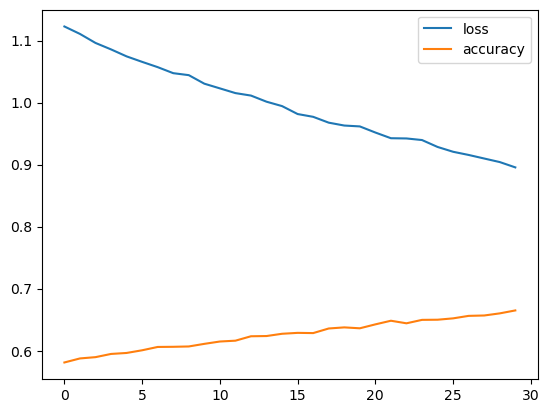

In [231]:
# Let's check the loss and accuracy changes along with running of sequential models

seq_pipeline.named_steps['seq_model'].history.history
pd.DataFrame(seq_pipeline.named_steps['seq_model'].history.history).plot();

In [108]:
seq_pipeline.named_steps['seq_model'].history.history['accuracy']

[0.2804165184497833,
 0.37127023935317993,
 0.39794179797172546,
 0.4210205674171448,
 0.4380708932876587,
 0.4529899060726166,
 0.45798319578170776,
 0.47144076228141785,
 0.482036292552948,
 0.49013519287109375,
 0.4947631359100342,
 0.5018877387046814,
 0.5103519558906555,
 0.5149189829826355,
 0.5173547863960266,
 0.527341365814209,
 0.5312994718551636,
 0.5370234847068787,
 0.540738046169281,
 0.5487760305404663,
 0.5513336062431335,
 0.5563877820968628,
 0.560528576374054,
 0.5619900226593018,
 0.5693581700325012,
 0.5767872333526611,
 0.5759956240653992,
 0.5754475593566895,
 0.5815978646278381,
 0.5828157067298889]

In [109]:
y_pred = seq_pipeline.predict(X_test)

49/49 [==============================] - 0s 1ms/step


In [110]:
y_pred.shape

(1561, 23)

In [111]:
class_names = 'AAA AA+ AA AA- A+ A A- BBB+ BBB BBB- BB+ BB BB- B+ B B- CCC+ CCC CCC- CC+ CC C D'.split()
class_names

['AAA',
 'AA+',
 'AA',
 'AA-',
 'A+',
 'A',
 'A-',
 'BBB+',
 'BBB',
 'BBB-',
 'BB+',
 'BB',
 'BB-',
 'B+',
 'B',
 'B-',
 'CCC+',
 'CCC',
 'CCC-',
 'CC+',
 'CC',
 'C',
 'D']

In [112]:
pd.Series(y_pred[0], index=class_names).sort_values(ascending=False)

B       2.922718e-01
AA+     2.158254e-01
A       1.697024e-01
AAA     1.322996e-01
AA      9.247492e-02
B+      6.060620e-02
B-      3.549610e-02
BBB     4.795238e-04
BB+     3.665087e-04
BB-     2.634028e-04
BB      1.039911e-04
A+      7.402656e-05
BBB+    2.185422e-05
CC+     6.936556e-06
BBB-    5.245013e-06
CC      2.134283e-06
C       3.727441e-08
AA-     6.367068e-09
A-      6.212142e-09
D       2.274812e-09
CCC-    2.452420e-10
CCC     1.091835e-10
CCC+    1.252735e-11
dtype: float32

## 6. Model inpretation

### Permutation Importance

In [131]:
# For the model inpretation, we try MLPClassifier first

nn = MLPClassifier((50, 50), random_state=2)

nn.pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros', RandomOverSampler()),
    ('nn', nn)
])
nn.pipeline.fit(X_train, y_train)

Pipeline(steps=[('prc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('exp',
                                                  FunctionTransformer(func=<ufunc 'exp'>),
                                                  ['ROA - Return On Assets']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Current Ratio',
                                                   'EBITDA Margin',
                                                   'Asset Turnover',
                                                   'ROE - Return On Equity',
                                                   'Return On Tangible '
                                                   'Equity']),
                                                 ('cat', OneHotEncoder(),
                                               

In [132]:
perm = PermutationImportance(nn, random_state=1)

nn_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros', RandomOverSampler()),
    ('nn', perm)
])
nn_pipeline.fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train_transformeddf.columns.tolist())

Weight,Feature
0.3050 ± 0.0059,target_SIC Code
0.1808 ± 0.0033,Binary Rating_1
0.1624 ± 0.0016,Binary Rating_0
0.1530 ± 0.0070,Rating Agency_Egan-Jones Ratings Company
0.1332 ± 0.0039,Sector_Enrgy
0.1097 ± 0.0013,Rating Agency_Standard & Poor's Ratings Services
0.1075 ± 0.0022,Rating Agency_Moody's Investors Service
0.0810 ± 0.0032,log_Asset Turnover
0.0652 ± 0.0018,Sector_BusEq
0.0641 ± 0.0029,Sector_Other


The permutation importance model shows us the weight of different features.

### Lime

In [141]:
nn = MLPClassifier((50, 50), random_state=2)

nn_pipeline = Pipeline([
    ('prc', preprocessor),
    ('ros', RandomOverSampler()),
    ('nn', nn)
])

nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('exp',
                                                  FunctionTransformer(func=<ufunc 'exp'>),
                                                  ['ROA - Return On Assets']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Current Ratio',
                                                   'EBITDA Margin',
                                                   'Asset Turnover',
                                                   'ROE - Return On Equity',
                                                   'Return On Tangible '
                                                   'Equity']),
                                                 ('cat', OneHotEncoder(),
                                               

In [146]:
len(col_names)

38

In [165]:
new_X_train_values = preprocessor.fit_transform(X_train, y_train)

In [172]:
# Setup Lime object with features/label names

explainer = LimeTabularExplainer(new_X_train_values, feature_names = \
                                 col_names, class_names=class_names)

In [227]:
pd.Series(y_test).value_counts() 

13    196
14    184
0     182
2     143
15    142
11     88
8      88
1      83
12     83
10     75
7      68
9      67
5      46
3      41
20     34
6      12
19     12
4      10
22      2
16      2
17      2
21      1
dtype: int64

In [185]:
pd.Series(y_test)

0       14
1        8
2        1
3        7
4       15
        ..
1556     2
1557    15
1558     2
1559    14
1560     9
Length: 1561, dtype: int32

In [174]:
# encoding test set for using lime

lime_X_test = pd.DataFrame(preprocessor.transform(X_test), columns=col_names)
lime_X_test

,exp_ROA - Return On Assets,log_Current Ratio,log_EBITDA Margin,log_Asset Turnover,log_ROE - Return On Equity,log_Return On Tangible Equity,Rating Agency_DBRS,Rating Agency_Egan-Jones Ratings Company,Rating Agency_Fitch Ratings,Rating Agency_HR Ratings de Mexico S.A. de C.V.,...,outlier_Long-term Debt / Capital,outlier_Debt/Equity Ratio,outlier_Gross Margin,outlier_Operating Margin,outlier_EBIT Margin,outlier_Pre-Tax Profit Margin,outlier_Net Profit Margin,outlier_Free Cash Flow Per Share,outlier_ROI - Return On Investment,outlier_Operating Cash Flow Per Share
0,2.046311,0.024489,0.464325,0.158033,0.481942,0.469572,0.0,1.0,0.0,0.0,...,0.838030,0.884214,0.717356,0.861157,0.861157,0.705212,0.672546,0.547958,0.763733,0.73833
1,1.944774,0.026062,0.464216,0.036170,0.479586,0.462505,0.0,0.0,0.0,0.0,...,0.838620,0.884536,0.663428,0.854502,0.854502,0.688492,0.651732,0.543797,0.733841,0.73833
2,1.952981,0.021874,0.474298,0.020835,0.479789,0.461791,0.0,1.0,0.0,0.0,...,0.836893,0.884132,0.741741,0.864995,0.864995,0.701731,0.666349,0.555683,0.737385,0.73833
3,1.956888,0.104118,0.449927,0.155753,0.479740,0.462051,0.0,0.0,0.0,0.0,...,0.837283,0.884003,0.628774,0.840291,0.840291,0.686873,0.656818,0.542371,0.736358,0.73833
4,1.951020,0.109792,0.458086,0.069177,0.479639,0.461689,0.0,1.0,0.0,0.0,...,0.835991,0.883765,0.671583,0.843256,0.843256,0.688532,0.657722,0.548205,0.735283,0.73833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1.997008,0.090809,0.468167,0.069841,0.480323,0.462565,0.0,1.0,0.0,0.0,...,0.836697,0.883903,0.738515,0.865094,0.865094,0.708491,0.676198,0.547501,0.746443,0.73833
1557,1.971622,0.040586,0.447601,0.229442,0.480378,0.462389,0.0,0.0,0.0,0.0,...,0.836995,0.883950,0.498679,0.835484,0.835484,0.686326,0.657699,0.547298,0.746592,0.73833
1558,2.062623,0.066910,0.489568,0.069763,0.480450,0.463132,0.0,0.0,0.0,0.0,...,0.833069,0.883464,0.935700,0.904543,0.904543,0.740977,0.701765,0.558081,0.758622,0.73833
1559,1.974818,0.044357,0.466563,0.073471,0.480007,0.461992,0.0,0.0,0.0,0.0,...,0.835692,0.883718,0.606013,0.857533,0.857533,0.697431,0.663163,0.544683,0.742616,0.73833


In [229]:
# pick a rating we want to analyze
rating_id = 2

# Get the explanation of the 'black box' model
exp = explainer.explain_instance(lime_X_test.loc[rating_id], nn.predict_proba, num_features = 23, top_labels=3)

# Display explanation
exp.show_in_notebook()

## 7. Conclusion

1. Among the models we tried, Random Forest performs better than the others, with an accuracy of 0.58. After hyper parameter tuning, this figure further increased to 0.59.
2. Although stacking doesn't make the model's perform better, the deep learning model does substantially amrliorate the performance of the model, with an accuracy rate higer than 0.66.
3. We use the accuracy rate for matric, partly due to the number of label classes, which reaches 23, making the f1-score and recall difficult for comparison.
4. The permutation importance analysis shows the most important feaures to affect the rating results are SIC code, binary rating and rating agencies; while the lime analysis provides us with the similar outcomes.
5. In general, we achieved our objective to build up a machine learning model that could predict a rating result of a given company.